# Homework 3-P. Perceptron

***Double Click here to edit this cell***

- Name: 김현동
- Student ID: 201901208
- Submission date: 2023-05-09

## Do this homework on anaconda
## Homework Purpose: Learn SGD and Perceptron

## Perceptron model

![image-3.png](attachment:image-3.png)

### The net input of the perceptron including the bias

![image-2.png](attachment:image-2.png)

#### Remark:

$$\sum_{i=1}^{m} w_i x_i + b = b + w_1 x_1 + \cdots + w_m x_m = (w_0, w_1, \cdots, w_m) \cdot (1, x_1, \cdots, x_m)$$
where $w_0 = b$

### Vector form of the net input

![image.png](attachment:image.png)

### The perceptron fires if and only if the net input is non-negative

![image.png](attachment:image.png)

### Perceptron as a Binary Classifier

- A linear classifier uses lines to classify data points—any object on one side of the line is part of one class and any object on the other side is part of the other class. 
- A successful linear classifier could use $H_1$ or $H_2$ to discriminate between the two classes, whereas $H_3$ would be a poor decision boundary.
- $H_1$ or $H_2$ are called a separating hyperplane

![image-2.png](attachment:image-2.png)

### Geometric Interpretation of a separating hyperplane

![image-3.png](attachment:image-3.png)

### When a data is miclassified, we move w to a certain direction

- Which direction? How much should we move? Figure it out

![image-2.png](attachment:image-2.png)

## Remark: gradient_descent.py, linear_algebra.py must be in the folder having this notebook file

In [ ]:
# run this cell
from gradient_descent import *
from linear_algebra import *

## Problem 1 (30 pts)

- We want to implement a simple neural network called ```Perceptron```.
- We will use ```minimize_stochastic``` to optimize the network

### The code of SGD
```python
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]
        
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = list(zip(x, y))
    theta = theta_0
    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0  

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        count += 1
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
            
    min_theta = theta
    
    return min_theta
```

### You should define an error function and a gradient function for perceptron:
### Remark: ONE or TWO lines for an error function and a gradient function are enough. If the number of lines > 2, you get a penalty

### Define your error function here:

In [ ]:
# YOUR CODE MUST BE HERE
def perceptron_error(x_i, y_i, w):
    w = np.array(w).reshape(-1,1)
    return int(np.sign(np.dot(x_i, w)) != y_i)

### Define your gradient function here:

In [ ]:
# # YOUR CODE MUST BE HERE
def perceptron_error_gradient(x_i, y_i, w):
    w = np.array(w).reshape(-1,1)
    return (np.sign(np.dot(x_i, w)) - y_i) * x_i

### Define a function to shade a decision boundary

- The region of $w_1 \cdot x_1 + w_2 \cdot x_2 + w_0 \ge 0$  are shaded as red; otherwise shaded as blue
- ```x_min, x_max, y_min, y_max``` defines a shading area
- The resulting shading and plotting must be very similar as shown in the given answer images

In [ ]:
# # #YOUR CODE MUST BE HERE

def shade_decision_region(X, y, w, x_min, x_max, y_min, y_max, cmap='coolwarm'):
    
    fig, ax = plt.subplots()
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.array([np.sign(np.dot(w, [1, x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    
    X = np.array(X)
    y = np.array(y)
    
    ax.scatter(X[y==-1, 1], X[y==-1, 2], marker='o', c='blue')
    ax.scatter(X[y==1, 1], X[y==1, 2], marker='o', c='red')
    
    plt.show()


### Test Case 1: OR

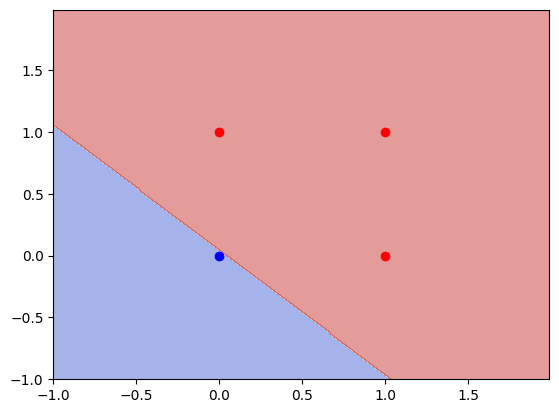

In [ ]:
# DO NOT EDIT THIS CELL
# RUN THIS CELL

import matplotlib.pyplot as plt
import numpy as np 

X = [[1,0,0], [1,0,1], [1,1,0], [1,1,1]]
y = [-1, 1, 1, 1]

random.seed(2)
theta = [1, random.random(),random.random()]

w = minimize_stochastic(perceptron_error,
                        perceptron_error_gradient,
                        X,
                        y,
                        theta,
                        0.1)

shade_decision_region(X, y, w, x_min=-1, x_max=2, y_min=-1, y_max=2)








#### Your output must be similar to the following:

![image.png](attachment:image.png)

### Test Case 2: AND

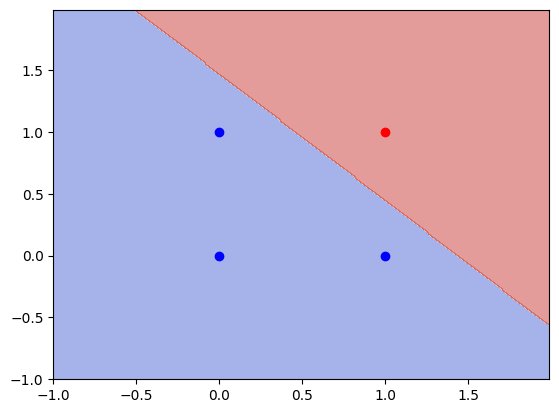

In [ ]:
# DO NOT EDIT THIS CELL
# RUN THIS CELL

import matplotlib.pyplot as plt
import numpy as np 

X = [[1,0,0], [1,0,1], [1,1,0], [1,1,1]]
y = [-1, -1, -1, 1]

# choose random value to start
random.seed(2)
theta = [1, random.random(),random.random()]

w = minimize_stochastic(perceptron_error,
                        perceptron_error_gradient,
                        X,
                        y,
                        theta,
                        0.1)

shade_decision_region(X, y, w, x_min=-1, x_max=2, y_min=-1, y_max=2)




#### Your output must be similar to the following:

![image.png](attachment:image.png)

### Test Case 3: XOR

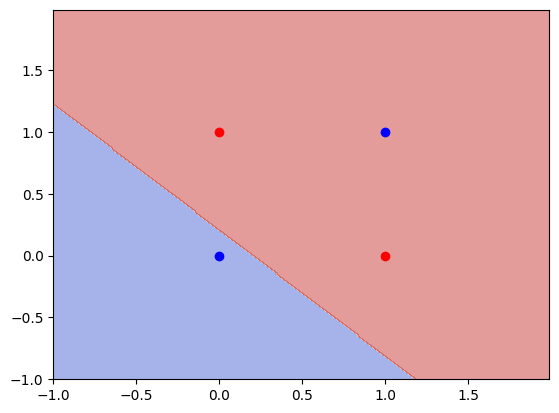

In [ ]:
# DO NOT EDIT THIS CELL
# RUN THIS CELL

import matplotlib.pyplot as plt
import numpy as np 

X = [[1,0,0], [1,0,1], [1,1,0], [1,1,1]]
y = [-1, 1, 1, -1]

# choose random value to start
random.seed(2)
theta = [1, random.random(),random.random()]

w = minimize_stochastic(perceptron_error,
                        perceptron_error_gradient,
                        X,
                        y,
                        theta,
                        0.1)

shade_decision_region(X, y, w, x_min=-1, x_max=2, y_min=-1, y_max=2)

#### Your output must be similar to the following:

![image.png](attachment:image.png)

### Test Case 4: Right

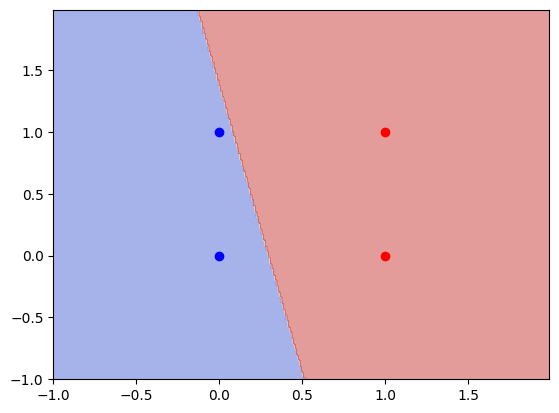

In [ ]:
# DO NOT EDIT THIS CELL
# RUN THIS CELL

import matplotlib.pyplot as plt
import numpy as np 

X = [[1,0,0], [1,0,1], [1,1,0], [1,1,1]]
y = [-1, -1, 1, 1]

# choose random value to start
random.seed(2)
theta = [1, random.random(),random.random()]

w = minimize_stochastic(perceptron_error,
                        perceptron_error_gradient,
                        X,
                        y,
                        theta,
                        0.1)

shade_decision_region(X, y, w, x_min=-1, x_max=2, y_min=-1, y_max=2)




#### Your output must be similar to the following:

*   항목 추가
*   항목 추가



![image.png](attachment:image.png)

### Test Case 5: Upper

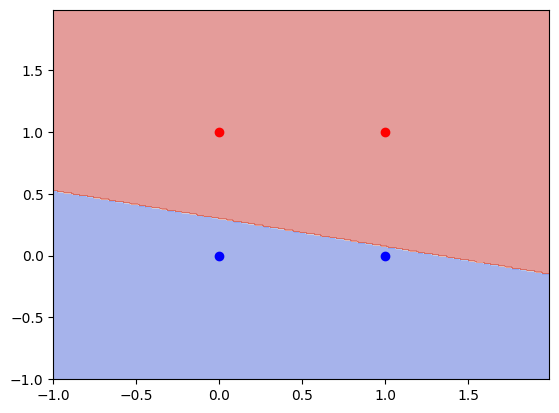

In [ ]:
# DO NOT EDIT THIS CELL
# RUN THIS CELL

import matplotlib.pyplot as plt
import numpy as np 

X = [[1,0,0], [1,0,1], [1,1,0], [1,1,1]]
y = [-1, 1, -1, 1]

# choose random value to start
random.seed(2)
theta = [1, random.random(),random.random()]

w = minimize_stochastic(perceptron_error,
                        perceptron_error_gradient,
                        X,
                        y,
                        theta,
                        0.1)

shade_decision_region(X, y, w, x_min=-1, x_max=2, y_min=-1, y_max=2)

#### Your output must be similar to the following:

![image.png](attachment:image.png)

### Test Case 6: Two Clusters

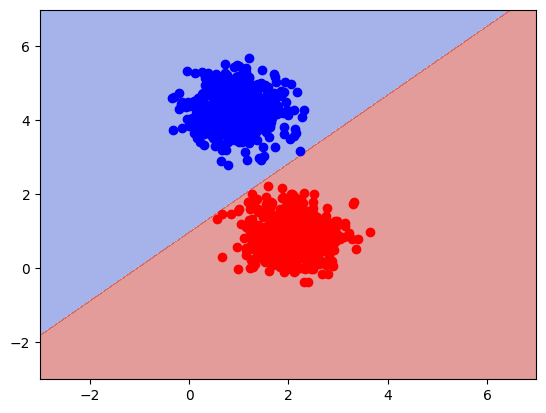

In [ ]:
# DO NOT EDIT THIS CELL
# RUN THIS CELL

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random

Xs, ys = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=0.5, random_state=0)
Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs))

# choose random value to start
random.seed(2)
theta = [1, random.random(),random.random()]

X = Xs1.tolist()
y = (np.where(ys == 1, 1, -1)).tolist()

w = minimize_stochastic(perceptron_error,
                        perceptron_error_gradient,
                        X,
                        y,
                        theta,
                        0.1)

shade_decision_region(X, y, w, x_min=-3, x_max=7, y_min=-3, y_max=7)

#### Your output must be similar to the following:

![image.png](attachment:image.png)

### Test Case 7: Two Big Clusters

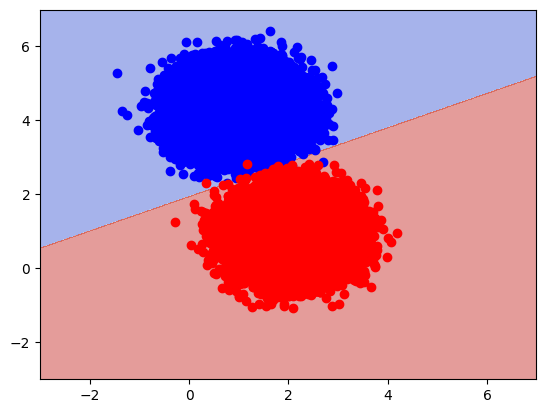

Total time taken : 263.30232334136963 seconds
My point is 4


In [ ]:
# DO NOT EDIT THIS CELL
# RUN THIS CELL

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import time

Xs, ys = make_blobs(n_samples=100000, n_features=2, centers=2, cluster_std=0.5, random_state=0)
Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs))

# choose random value to start
random.seed(2)
theta = [1, random.random(),random.random()]

X = Xs1.tolist()
y = (np.where(ys == 1, 1, -1)).tolist()

start = time.time()
w = minimize_stochastic(perceptron_error,
                        perceptron_error_gradient,
                        X,
                        y,
                        theta,
                        0.1)
end = time.time()

shade_decision_region(X, y, w, x_min=-3, x_max=7, y_min=-3, y_max=7)

lapse = end - start
total = 10
weight = 1.5
grace = 100.0
my_point = int(total / (weight ** (lapse // grace)))
print(f'Total time taken : {lapse} seconds')
print(f'My point is {my_point}')

#### Your output must be similar to the following:

![image.png](attachment:image.png)

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_3_홍길동_202200001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness, performance, and programming skills